In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op
import seaborn as sn
from iminuit import Minuit

# Loading the Data

In [2]:
total_data = pd.read_pickle('total_dataset.pkl')
signal = pd.read_pickle('signal.pkl')
jpsi = pd.read_pickle('jpsi.pkl')
psi2S = pd.read_pickle('psi2S.pkl')
jpsi_mu_k_swap = pd.read_pickle('jpsi_mu_k_swap.pkl')
jpsi_mu_pi_swap = pd.read_pickle('jpsi_mu_pi_swap.pkl')
k_pi_swap = pd.read_pickle('k_pi_swap.pkl')
phimumu = pd.read_pickle('phimumu.pkl')
pKmumu_piTok_kTop = pd.read_pickle('pKmumu_piTok_kTop.pkl')
pKmumu_piTop = pd.read_pickle('pKmumu_piTop.pkl')

In [3]:
total_data.iloc[2]

mu_plus_MC15TuneV1_ProbNNk     0.088214
mu_plus_MC15TuneV1_ProbNNpi    0.007898
mu_plus_MC15TuneV1_ProbNNmu    0.998085
mu_plus_MC15TuneV1_ProbNNe      0.00001
mu_plus_MC15TuneV1_ProbNNp      0.00353
                                 ...   
phi                           -1.738231
costhetal                      0.242143
costhetak                     -0.598537
polarity                              1
year                               2016
Name: 2, Length: 81, dtype: object

# Binning the Data

Without knowing which decays are the viable decays to be testing, we can't do much more with this. I have just binned the signal data set into the bins according to $q^2$ as given in the introductory material for the project. I'm aware that we may change these in accordance with literature values.

In [4]:
bin_0 = [] #
bin_1 = []
bin_2 = []
bin_3 = []
bin_4 = []
bin_5 = []
bin_6 = []
bin_7 = []
bin_8 = []
bin_9 = []

for i in range(0, len(signal['q2'])):
    if 0.1 < signal['q2'][i] < 0.98:
        bin_0.append(signal.iloc[i])
    elif 1.1 < signal['q2'][i] < 2.5:
        bin_1.append(signal.iloc[i])
    elif 2.5 < signal['q2'][i] < 4.0:
        bin_2.append(signal.iloc[i])
    elif 4.0 < signal['q2'][i] < 6.0:
        bin_3.append(signal.iloc[i])
    elif 6.0 < signal['q2'][i] < 8.0:
        bin_4.append(signal.iloc[i])
    elif 15.0 < signal['q2'][i] < 17.0:
        bin_5.append(signal.iloc[i])
    elif 17.0 < signal['q2'][i] < 19.0:
        bin_6.append(signal.iloc[i])
    elif 11.0 < signal['q2'][i] < 12.5:
        bin_7.append(signal.iloc[i])
    elif 1.0 < signal['q2'][i] < 6.0:
        bin_8.append(signal.iloc[i])
    elif 15.0 < signal['q2'][i] < 17.9:
        bin_9.append(signal.iloc[i])

In [29]:
data_0 = pd.DataFrame(bin_0)
data_1 = pd.DataFrame(bin_1)
data_2 = pd.DataFrame(bin_2)
data_3 = pd.DataFrame(bin_3)
data_4 = pd.DataFrame(bin_4)
data_5 = pd.DataFrame(bin_5)
data_6 = pd.DataFrame(bin_6)
data_7 = pd.DataFrame(bin_7)
data_8 = pd.DataFrame(bin_8)
#data_9 = pd.DataFrame(bin_9) #it turns out for the "signal" dataset bin 9 is empty

In [30]:
data = [data_0, data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8] #, data_9]

# Distributions

Below I wanted to see how the angular distributions varied within the different bins. Admitedly it is not a very good use of time or space but you never know. Could be useful... The histograms have not been normalised.

Below we have the mass distribution across the q$^2$ bins. We would hope these all look the same otherwise there is something wrong. This could be a good check to get a rough estimate of how successful the classification was.

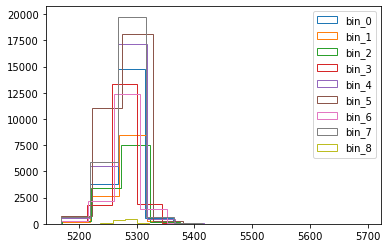

In [32]:
plt.hist(data_0['B0_MM'], histtype='step', label = 'bin_0')
plt.hist(data_1['B0_MM'], histtype='step', label = 'bin_1')
plt.hist(data_2['B0_MM'], histtype='step', label = 'bin_2')
plt.hist(data_3['B0_MM'], histtype='step', label = 'bin_3')
plt.hist(data_4['B0_MM'], histtype='step', label = 'bin_4')
plt.hist(data_5['B0_MM'], histtype='step', label = 'bin_5')
plt.hist(data_6['B0_MM'], histtype='step', label = 'bin_6')
plt.hist(data_7['B0_MM'], histtype='step', label = 'bin_7')
plt.hist(data_8['B0_MM'], histtype='step', label = 'bin_8')
#plt.hist(data_9['B0_MM'], histtype='step', label = 'bin_9') #bin 9 is empty???
plt.legend()
plt.show()

$\phi$ distribution across the q$^2$ bins

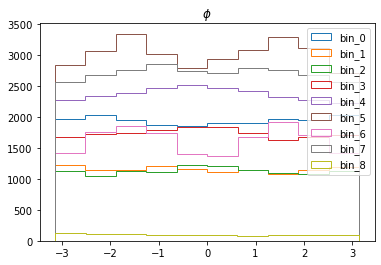

In [33]:
plt.hist(data_0['phi'], histtype='step', label = 'bin_0')
plt.hist(data_1['phi'], histtype='step', label = 'bin_1')
plt.hist(data_2['phi'], histtype='step', label = 'bin_2')
plt.hist(data_3['phi'], histtype='step', label = 'bin_3')
plt.hist(data_4['phi'], histtype='step', label = 'bin_4')
plt.hist(data_5['phi'], histtype='step', label = 'bin_5')
plt.hist(data_6['phi'], histtype='step', label = 'bin_6')
plt.hist(data_7['phi'], histtype='step', label = 'bin_7')
plt.hist(data_8['phi'], histtype='step', label = 'bin_8')
plt.title(r'$\phi$')
plt.legend()
plt.show()

$\cos(\theta_l)$ distribution across the q$^2$ bins. An interesting observation is that bins 5, 6 and 7 don't seem to follow a 'gaussian' shape like the others do. Why?

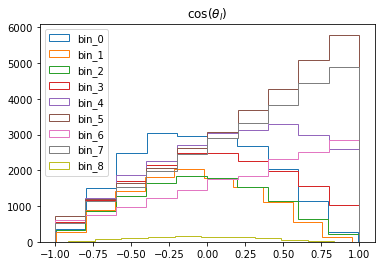

In [34]:
plt.hist(data_0['costhetal'], histtype='step', label = 'bin_0')
plt.hist(data_1['costhetal'], histtype='step', label = 'bin_1')
plt.hist(data_2['costhetal'], histtype='step', label = 'bin_2')
plt.hist(data_3['costhetal'], histtype='step', label = 'bin_3')
plt.hist(data_4['costhetal'], histtype='step', label = 'bin_4')
plt.hist(data_5['costhetal'], histtype='step', label = 'bin_5')
plt.hist(data_6['costhetal'], histtype='step', label = 'bin_6')
plt.hist(data_7['costhetal'], histtype='step', label = 'bin_7')
plt.hist(data_8['costhetal'], histtype='step', label = 'bin_8')
plt.title(r'$\cos(\theta_l)$')
plt.legend(loc=2)
plt.show()

$\cos(\theta_k)$ distribution across the q$^2$ bins. Not really sure what to say here. Hopeful if we get a PDF for this variable it'll make more sense.

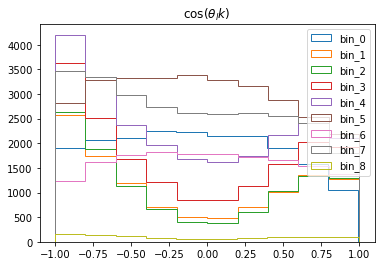

In [35]:
plt.hist(data_0['costhetak'], histtype='step', label = 'bin_0')
plt.hist(data_1['costhetak'], histtype='step', label = 'bin_1')
plt.hist(data_2['costhetak'], histtype='step', label = 'bin_2')
plt.hist(data_3['costhetak'], histtype='step', label = 'bin_3')
plt.hist(data_4['costhetak'], histtype='step', label = 'bin_4')
plt.hist(data_5['costhetak'], histtype='step', label = 'bin_5')
plt.hist(data_6['costhetak'], histtype='step', label = 'bin_6')
plt.hist(data_7['costhetak'], histtype='step', label = 'bin_7')
plt.hist(data_8['costhetak'], histtype='step', label = 'bin_8')
plt.title(r'$\cos(\theta_lk)$')
plt.legend()
plt.show()

In [36]:
#data_1

In [37]:
#total_data

# Fitting Code

Code taken entirely from the skeleton code file but with very slight ammendments so it could work for our data. All the outputed answers will be wrong since I have assumed a flat acceptance but hopeful it can act as a platform for future use.

In [81]:
def costhetal_PDF(fl, afb, costhetal):
    ctl = costhetal
    ct2l = (2*(ctl**2))-1
    P = (3/8)*((3/2) - (1/2)*fl + (1/2)*ct2l*(1 - 3*fl) + (8/3)*afb*ctl)
    acceptance = 0.5
    return P*(1/acceptance)

def log_likelihood(fl, afb, _bin):
    _bin = data[int(_bin)]
    ctl = _bin['costhetal']
    return -1*np.sum(np.log(costhetal_PDF(fl=fl, afb=afb, costhetal=ctl)))

In [82]:
#data[0]['costhetal']

Plot the log-likelihood against different values of afb and fl

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


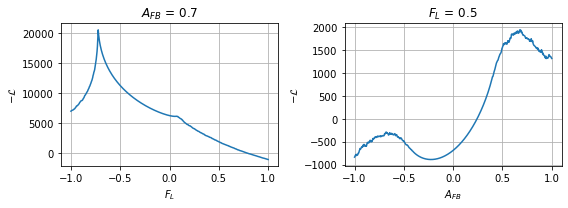

In [99]:
_test_bin = 1
_test_afb = 0.7
_test_fl = 0.5

x = np.linspace(-1, 1, 500)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(x, [log_likelihood(fl=i, afb=_test_afb, _bin=_test_bin) for i in x])
ax1.set_title(r'$A_{FB}$ = ' + str(_test_afb))
ax1.set_xlabel(r'$F_L$')
ax1.set_ylabel(r'$-\mathcal{L}$')
ax1.grid()
ax2.plot(x, [log_likelihood(fl=_test_fl, afb=i, _bin=_test_bin) for i in x])
ax2.set_title(r'$F_{L}$ = ' + str(_test_fl))
ax2.set_xlabel(r'$A_{FB}$')
ax2.set_ylabel(r'$-\mathcal{L}$')
ax2.grid()
plt.tight_layout()
plt.show()

Here we want to find the paarameters that maximise the log-likelihood (minimise the negative log-likelihood). Something has gone wrong here!!

In [107]:
bin_number_to_check = 5  # bin that we want to check in more details in the next cell
bin_results_to_check = None

log_likelihood.errordef = Minuit.LIKELIHOOD
decimal_places = 3
starting_point = [-0.1,0.0]
fls, fl_errs = [], []
afbs, afb_errs = [], []
for i in range(len(data)):
    m = Minuit(log_likelihood, fl=starting_point[0], afb=starting_point[1], _bin=i)
    m.fixed['_bin'] = True  # fixing the bin number as we don't want to optimize it
    m.limits=((-1.0, 1.0), (-1.0, 1.0), None)
    m.migrad()
    m.hesse()
    if i == bin_number_to_check:
        bin_results_to_check = m
    fls.append(m.values[0])
    afbs.append(m.values[1])
    fl_errs.append(m.errors[0])
    afb_errs.append(m.errors[1])
    #print(f"Bin {i}: {np.round(fls[i], decimal_places)} pm {np.round(fl_errs[i], decimal_places)},", f"{np.round(afbs[i], decimal_places)}

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


This shows the outputed values of the the fit parameters but i'm in no way sure as to what the graphs are meant to represent. They also look DREADFUL for all bins other than 3, 5, 6

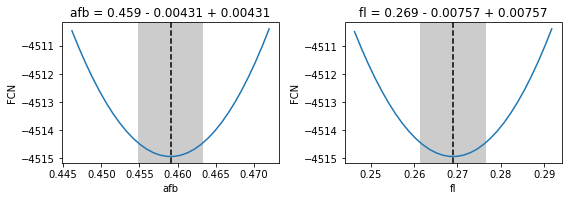

In [108]:
plt.figure(figsize=(8, 5))
plt.subplot(221)
bin_results_to_check.draw_mnprofile('afb', bound=3)
plt.subplot(222)
bin_results_to_check.draw_mnprofile('fl', bound=3)
plt.tight_layout()
plt.show()

This will plot the a histogram with the PDF containing our optimised parameters overplotted. This works well for bins 3, 5, 6. It seems tollerable for bin 0 and the rest it flat out fails. If someone spots my mistake feel free to change it.

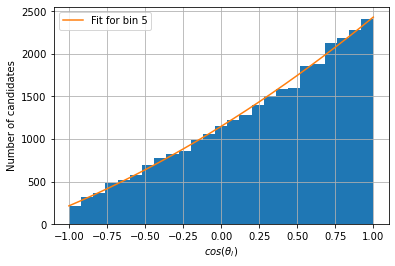

In [104]:
bin_to_plot = 5
number_of_bins_in_hist = 25
cos_theta_l_bin = data[bin_to_plot]['costhetal']
hist, _bins, _ = plt.hist(cos_theta_l_bin, bins=number_of_bins_in_hist)
x = np.linspace(-1, 1, number_of_bins_in_hist)
pdf_multiplier = np.sum(hist) * (np.max(cos_theta_l_bin) - np.min(cos_theta_l_bin)) / number_of_bins_in_hist
y = PDF(fl=fls[bin_to_plot], afb=afbs[bin_to_plot], costhetal=x) * pdf_multiplier
plt.plot(x, y, label=f'Fit for bin {bin_to_plot}')
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'Number of candidates')
plt.legend()
plt.grid()
plt.show()

This plots the fit parameters for the different bins. A little bit overkill. A point to note is the Fl appears to be wrong. It has outputed '1' for all except 3 bins. Could be due to the incorrect acceptance, or i've made a mistake somewhere. Fuuny enough,  the bins where the cell above works well are the same ones where we get values of Fl that are not '1'.

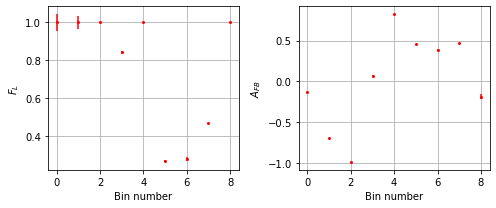

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
ax1.errorbar(np.linspace(0, len(data) - 1, len(data)), fls, yerr=fl_errs, fmt='o', markersize=2, label=r'$F_L$', color='red')
ax2.errorbar(np.linspace(0, len(data) - 1, len(data)), afbs, yerr=afb_errs, fmt='o', markersize=2, label=r'$A_{FB}$', color='red')
ax1.grid()
ax2.grid()
ax1.set_ylabel(r'$F_L$')
ax2.set_ylabel(r'$A_{FB}$')
ax1.set_xlabel(r'Bin number')
ax2.set_xlabel(r'Bin number')
plt.tight_layout()
plt.show()